## INFS3081 Predictive Analytics

### Practical Activity 4.4.1: Logistic Regression

Logistic regression is a linear model for classification. Logistic regression is also known as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. More technical details can be found at: 👉 [scikit-learn: Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In this practical, we will use the Breast Cancer Wisconsin (Diagnostic) Dataset. The dataset is downloaded from: 👉 [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

The dataset consists of 569 samples. Each sample has 30 features. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The task is to classify each sample into two classes: Benign (1) or Malignant (0).


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font', size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import RFE
sns.set_theme(style="whitegrid")


In [3]:
# Load the dataset
data = pd.read_csv('wdbc.csv', header=0)

In [4]:
data.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
data.shape

(569, 31)

C:\Users\micha\AppData\Local\Temp\ipykernel_25188\2196817613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='hls')


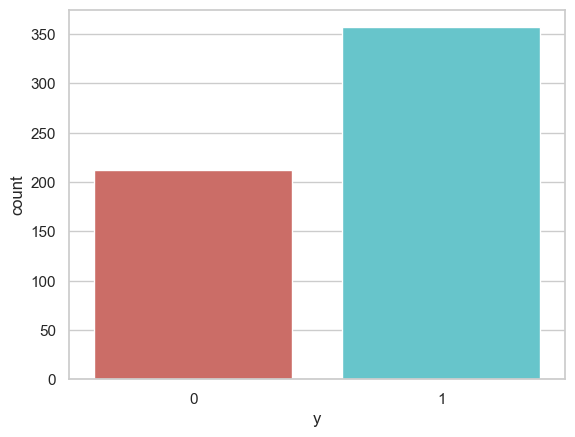

In [6]:
# See label distribution
sns.countplot(x='y', data=data, palette='hls')
plt.show()

In [8]:
count_Benign = len(data[data['y'] == 1])
count_Malignant = len(data[data['y'] == 0])
Total = count_Benign + count_Malignant
pct_of_Benign = count_Benign / Total * 100
print("Percentage of Benign samples in the dataset: {:.2f}%".format(pct_of_Benign))
pct_of_Malignant = count_Malignant / Total * 100
print("Percentage of Malignant samples in the dataset   : {:.2f}%".format(pct_of_Malignant))


Percentage of Benign samples in the dataset: 62.74%
Percentage of Malignant samples in the dataset   : 37.26%


We can see that the classes are slightly imbalanced. The number of samples available for benign class are significantly higher than the malignant class.

In [9]:
X = data.iloc[:, data.columns != 'y']
y = data.iloc[:, data.columns == 'y']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

#### Feature scaling or Feature normalization
Feature normalization is a common pre-processing requirement for many machine learning models. In this example, we use the min-max normalization.

In [11]:
# Feature scaling or feature normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
X_train = X_train.iloc[:,:]
X_test = X_test.iloc[:,:]

#### Feature selection
Different kinds of feature selection algorithms can be used to select only the most important features. In this example we use the SelectKBest feature selection method.

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

skb = SelectKBest(score_func=mutual_info_classif, k=10)
sel_skb = skb.fit(X_train, y_train.values.ravel())
selected_features_ind = sel_skb.get_support()

In [15]:
print('scores: ', sel_skb.scores_)

scores:  [0.33295197 0.09060798 0.39385989 0.34892171 0.10447596 0.27625776
 0.38243749 0.45571609 0.05901108 0.00841029 0.25956106 0.00823846
 0.2637449  0.32200099 0.00977559 0.06752773 0.12561756 0.1335974
 0.00415212 0.05232842 0.42357674 0.12404782 0.45691125 0.45290918
 0.10454738 0.23268039 0.3280217  0.46103022 0.0639162  0.03100221]


In [17]:
X_train_new = X_train.iloc[:, selected_features_ind]
X_test_new = X_test.iloc[:, selected_features_ind]
X_train_new.shape

(398, 10)

#### Train and test a Logistic Regression model

In [18]:
from sklearn import metrics

In [19]:
# Train a Logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_new, y_train.values.ravel())


LogisticRegression()

In [20]:
# Test the model
y_pred = logreg.predict(X_test_new)

#### Results and Analysis

In [22]:
# Classification accuracy
print('Accuracy on test set: {:.2f}'.format(logreg.score(X_test_new, y_test)))

Accuracy on test set: 0.92


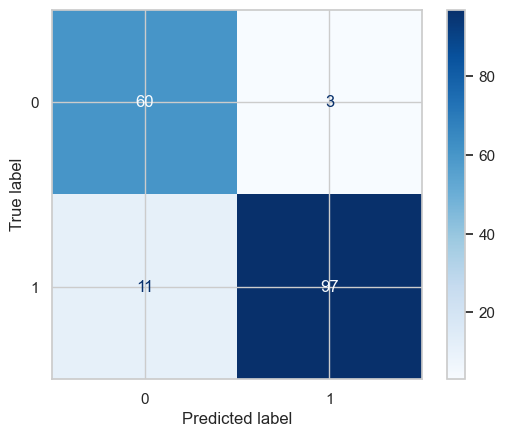

In [24]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [25]:
# Performance measures
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign'], zero_division=0))

              precision    recall  f1-score   support

   Malignant       0.85      0.95      0.90        63
      Benign       0.97      0.90      0.93       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.91       171
weighted avg       0.92      0.92      0.92       171



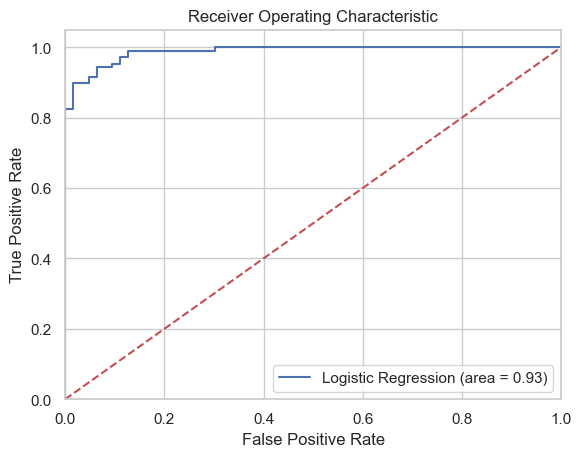

In [26]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_new))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### What's under here is just me testing things and is not part of the activity

In [27]:
X_train_new.head()


,Feature1,Feature3,Feature4,Feature7,Feature8,Feature21,Feature23,Feature24,Feature27,Feature28
0,0.213403,0.208693,0.110880,0.124367,0.097863,0.159018,0.157528,0.069406,0.234932,0.255977
1,0.166075,0.159422,0.080933,0.053819,0.088469,0.111348,0.101350,0.046746,0.076226,0.224871
2,0.249373,0.238270,0.134380,0.091026,0.115855,0.201352,0.180238,0.093148,0.175837,0.282845
3,0.536182,0.516965,0.380700,0.191401,0.288966,0.475987,0.442203,0.301022,0.320181,0.541164
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
